**STEP 1**: The installation, importation and upgrade of the necessary libraries for this project.

In [74]:
!pip install yfinance pandas numpy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**STEP 2**: The creation of a clear interface for the change of ticker, start date and end dates. I never miss this in my codes. This is to ease accessibility. Here, a pipeline to the Yahoo Finance API is created to collect the data based on the ticker, start date and end date

In [75]:
ticker = "NVDA"
start_date = "2021-01-01"
end_date = "2024-11-22"

data = yf.download(ticker, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Date                                                                        
2021-01-04 00:00:00+00:00   13.081204   13.113500   13.652500   12.962500   
2021-01-05 00:00:00+00:00   13.371737   13.404750   13.443500   13.087000   
2021-01-06 00:00:00+00:00   12.583432   12.614500   13.245000   12.586000   
2021-01-07 00:00:00+00:00   13.311135   13.344000   13.377750   12.886500   
2021-01-08 00:00:00+00:00   13.244050   13.276750   13.421000   13.042000   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  141.979996  141.979996  145.240005  140.080002   
2024-11-18 00:00:00+00:00  140.149994  140.149994  141.550003  137.149994   
2024-11-19 00:00:00+00:00  147.009995  147.009995  147.130005  140.990005   
2024-11-20 00:00:00+00:00  145.889999  145.889999  147.559998  142.729996   

**STEP 3**: Dropping the columns that are not needed for this project. The necessary columns are the CLOSE column and DATE column

In [76]:
data = data.drop(columns=['Adj Close', 'Volume', 'Open', 'High', 'Low'])
print(data)

Price                           Close
Ticker                           NVDA
Date                                 
2021-01-04 00:00:00+00:00   13.113500
2021-01-05 00:00:00+00:00   13.404750
2021-01-06 00:00:00+00:00   12.614500
2021-01-07 00:00:00+00:00   13.344000
2021-01-08 00:00:00+00:00   13.276750
...                               ...
2024-11-15 00:00:00+00:00  141.979996
2024-11-18 00:00:00+00:00  140.149994
2024-11-19 00:00:00+00:00  147.009995
2024-11-20 00:00:00+00:00  145.889999
2024-11-21 00:00:00+00:00  146.669998

[979 rows x 1 columns]


**STEP 4**: Conversion of the collected data into a dataframe. There are several reasons for this step. One being its importance in data preprocessing. Another being its importance in handling diverse data (float, integer, strings etc). It is a flexibe structure for this purpose. Also, it is also needed in handling missing data.

In [77]:
df = pd.DataFrame(data)
print(df)

Price                           Close
Ticker                           NVDA
Date                                 
2021-01-04 00:00:00+00:00   13.113500
2021-01-05 00:00:00+00:00   13.404750
2021-01-06 00:00:00+00:00   12.614500
2021-01-07 00:00:00+00:00   13.344000
2021-01-08 00:00:00+00:00   13.276750
...                               ...
2024-11-15 00:00:00+00:00  141.979996
2024-11-18 00:00:00+00:00  140.149994
2024-11-19 00:00:00+00:00  147.009995
2024-11-20 00:00:00+00:00  145.889999
2024-11-21 00:00:00+00:00  146.669998

[979 rows x 1 columns]


**STEP 5**: The **calculate_rsi** function in the code below computes the Relative Strength Index (RSI) which is used to identify overbought or oversold conditions in a stock. It starts by calculating the price changes between consecutive days. If the price change is positive, it is considered a gain; otherwise, it is considered a loss.

Next, the function calculates the average gain and average loss over a specified period. The ratio of average gain to average loss is then computed, which gives the Relative Strength (RS). Using this RS, the function applies the RSI formula. This results in an RSI value that ranges from 0 to 100. Values above 70 typically indicate that the asset is overbought, while values below 30 suggest it is oversold.

In [78]:
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()

    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)

    avg_gain = gains.rolling(window=period).mean()
    avg_loss = losses.rolling(window=period).mean()

    rs = avg_gain / avg_loss

    df['RSI'] = 100 - (100 / (1 + rs))

    return df

df = calculate_rsi(df)
print(df[['Close', 'RSI']])

Price                           Close        RSI
Ticker                           NVDA           
Date                                            
2021-01-04 00:00:00+00:00   13.113500        NaN
2021-01-05 00:00:00+00:00   13.404750        NaN
2021-01-06 00:00:00+00:00   12.614500        NaN
2021-01-07 00:00:00+00:00   13.344000        NaN
2021-01-08 00:00:00+00:00   13.276750        NaN
...                               ...        ...
2024-11-15 00:00:00+00:00  141.979996  51.858441
2024-11-18 00:00:00+00:00  140.149994  48.637932
2024-11-19 00:00:00+00:00  147.009995  58.460179
2024-11-20 00:00:00+00:00  145.889999  66.466023
2024-11-21 00:00:00+00:00  146.669998  64.825054

[979 rows x 2 columns]


**STEP 6**: Plotting the chart

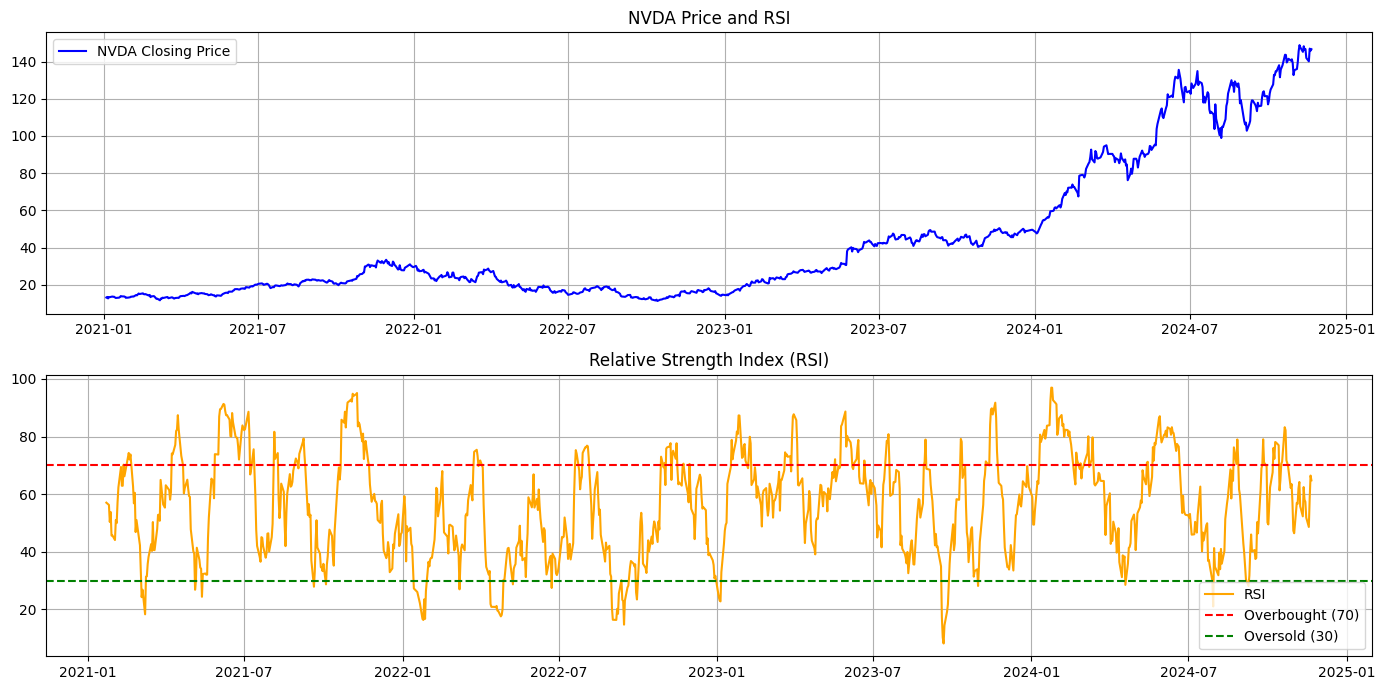

In [79]:
def plot_rsi(df, ticker):
    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    plt.plot(df['Close'], label=f'{ticker} Closing Price', color='blue')
    plt.title(f'{ticker} Price and RSI')
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(df['RSI'], label='RSI', color='orange')
    plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
    plt.title('Relative Strength Index (RSI)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_rsi(df, ticker)